# 과제 3: 시뮬레이션 결과를 애니메이션으로 시각화하기

보통 시뮬레이션 결과를 정적인 그래프로 시각화 하게 되는데, 시간에 따라 변화하는 상황에서는 애니메이션으로 보는 것이 가장 분석하기 좋습니다. 그래서 이번 과제에서는 시뮬레이션 결과를 애니메이션으로 시각화하는 방법을 배워볼게요.

<video width="640" height="480" controls>
  <source src="https://matplotlib.org/stable/_images/sphx_glr_double_pendulum_001.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>
<p><strong>Figure 1.</strong> 예시: 이중 진자의 시간에 따른 움직임과 궤적 애니메이션</p>

먼저 정적인 그래프를 그리는 방법부터 복습해봅시다. 능숙하신 분은 넘어가셔도 좋아요.

## 1. 정적인 그래프 그리기

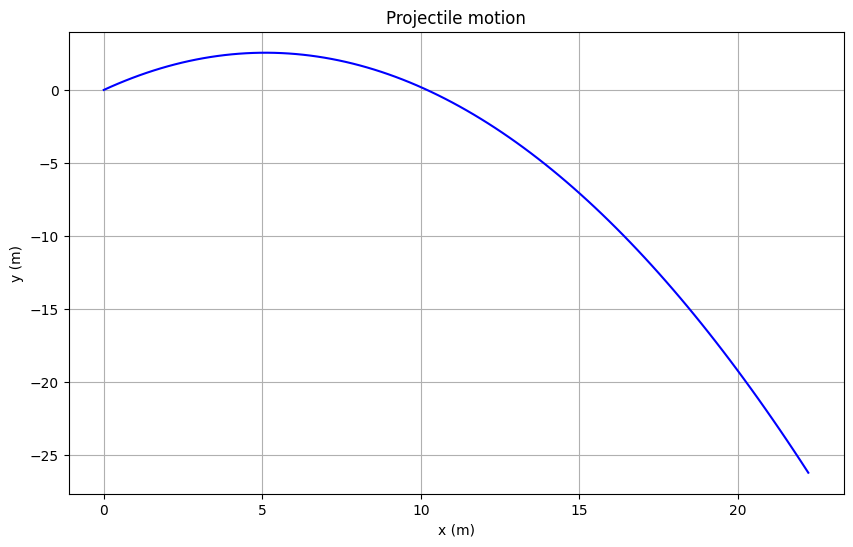

In [1]:
import matplotlib.pyplot as plt # 그래프를 그리기 위한 라이브러리
import numpy as np # 수학적 계산을 위한 라이브러리

# x와 y 데이터 생성
v0 = 10 # m/s, 초기 속도
g = 9.81 # m/s^2, 중력 가속도
theta = np.pi / 4 # 발사 각도 (45도)

t = np.linspace(0, np.pi, 100) # s, 0부터 2π까지 100개의 점 생성
# 운동 방정식을 풀어 얻은 포물선 운동 공식
x = v0 * np.cos(theta) * t # m, x 좌표
y = v0 * np.sin(theta) * t - 1/2 * g * t**2 # m, y 좌표

# 그래프 그리기
plt.figure(figsize=(10, 6)) # 그래프 크기 설정
plt.plot(x, y, color='blue') # x에 대한 y의 그래프 그리기
plt.title('Projectile motion') # 그래프 제목
plt.xlabel('x (m)') # x축 이름
plt.ylabel('y (m)') # y축 이름
plt.grid(True) # 그리드 표시
plt.show() # 그래프 출력

## 2. 좀 더 복잡한 그래프 그리기

아주 간단히 그래프 하나만 그릴 때는 위의 방법이면 충분합니다. 하지만 한 페이지에 여러 개의 그래프를 그리거나 3d 그래프를 그릴 때는 `subplot`을 이용해 그래프를 그려야 합니다. 기본 개념은 다음 그림과 같습니다.

<div style="text-align: center">
  <img src="https://mblogthumb-phinf.pstatic.net/MjAyMDExMTdfMjQ1/MDAxNjA1NTkwNDAwMDc3.8G3Xj2CzKQQLjtVHrmjGWEEZntdvqYvKq9_2ZRXt0ucg.1qPPSW8s19opOwpkRGOAX7ggwdT_kMweMA0GkTSLUFog.PNG.allieverwanted/%25EC%25A0%259C%25EB%25AA%25A9_%25EC%2597%2586%25EC%259D%258C.png?type=w966" width="400">
  <p><strong>Figure 2.</strong> Matplotlib의 figure, ax 개념을 설명하는 그림</p>
</div>

예제로 가로로 두개의 그래프를 배치해 볼게요. `figure` 함수로 `fig`를 만들고, `fig.add_subplot` 메소드로 각각의 그래프를 추가하면 됩니다. 아래 그림을 참고하면 다음 코드가 필요함을 알 수 있습니다.

```python
fig = plt.figure(figsize=(10, 6)) # figure를 만들고, 그래프 크기를 설정. 가로 10인치, 세로 6인치
ax1 = fig.add_subplot(1, 2, 1) # 첫 번째 서브플롯 추가. 1행 2열의 첫 번째 위치
ax2 = fig.add_subplot(1, 2, 2) # 두 번째 서브플롯 추가. 1행 2열의 두 번째 위치
```

<div style="text-align: center">
  <img src="https://wikidocs.net/images/page/141537/subplot_03.png" width="400">
  <p><strong>Figure 3.</strong> 원하는 위치에 그래프를 만드는 방법. 그림은 plt.subplot이지만 add_subplot도 입력은 같은 형식이다.</p>
</div>

실제로 그래프를 그려보면 다음과 같습니다. 왼쪽 그래프에는 포물선 운동 궤적을, 오른쪽 그래프에는 포물선 운동의 속도를 그려보겠습니다.

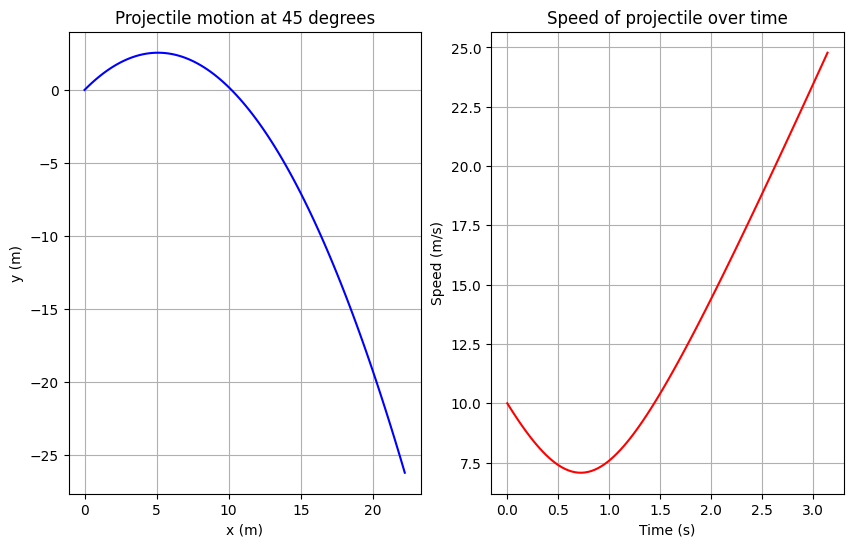

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# x와 y 데이터 생성
v0 = 10 # m/s, 초기 속도
g = 9.81 # m/s^2, 중력 가속도
theta = np.pi / 4 # 발사 각도 (45도)

t = np.linspace(0, np.pi, 100) # s, 0부터 2π까지 100개의 점 생성
# 운동 방정식을 풀어 얻은 포물선 운동 공식
x = v0 * np.cos(theta) * t # m, x 좌표
y = v0 * np.sin(theta) * t - 1/2 * g * t**2 # m, y 좌표
vx = v0 * np.cos(theta) # m/s, x 방향 속도
vy = v0 * np.sin(theta) - g * t # m/s, y 방향 속도
v = np.sqrt(vx**2 + vy**2) # m/s, 속도

# 그래프 그리기
fig = plt.figure(figsize=(10, 6)) # 그래프 크기 설정
ax1 = fig.add_subplot(1, 2, 1) # 첫 번째 서브플롯 추가. 1행 2열의 첫 번째 위치
ax2 = fig.add_subplot(1, 2, 2) # 두 번째 서브플롯 추가. 1행 2열의 두 번째 위치

ax1.plot(x, y, color='blue') # 첫 번째 서브플롯에 그래프 그리기
ax1.set_title('Projectile motion at 45 degrees') # 첫 번째 서브플롯 제목
ax1.set_xlabel('x (m)') # 첫 번째 서브플롯 x축 이름
ax1.set_ylabel('y (m)') # 첫 번째 서브플롯 y축 이름
ax1.grid(True) # 첫 번째 서브플롯 그리드 표시

ax2.plot(t, v, color='red') # 두 번째 서브플롯에 그래프 그리기
ax2.set_title('Speed of projectile over time') # 두 번째 서브플롯 제목
ax2.set_xlabel('Time (s)') # 두 번째 서브플롯 x축 이름
ax2.set_ylabel('Speed (m/s)') # 두 번째 서브플롯 y축 이름
ax2.grid(True) # 두 번째 서브플롯 그리드 표시

plt.show() # 그래프 출력

참고1: [`subplot`에 대한 wikidocs 문서](https://wikidocs.net/4761)

참고2: matplotlib을 이용한 더 다양한 예제들은 [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html)에서 확인할 수 있습니다. 직접 실행해볼 수 있는 예제도 많으니 참고하세요.

```python

## 3. 애니메이션
복습은 이정도로 하고, 본론인 애니메이션으로 들어가봅시다. matplotlib에서 애니메이션을 만드는 방법은 두가지가 있는데, 더 쉬운 방법인 `FuncAnimation`을 사용해볼게요. 원리는 간단합니다. $t=0$일 때의 그래프를 그린 후, 그래프를 그릴 때 사용한 데이터를 $t=$"다음 시간"의 데이터로 바꿔치기 하면서 그래프를 다시 그리는 것입니다. 이 과정을 반복하면 애니메이션이 만들어지겠죠? 

포물선 운동 그래프 코드를 응용해서, 시간에 따른 입자의 위치와 궤적을 애니메이션으로 만들어 볼게요.

<div style="text-align: center">
  <img src="https://i.sstatic.net/j1foD.gif" width="400">
  <p><strong>Figure 4.</strong> 다음과 같은 애니메이션을 만들고자 한다.</p>
</div>

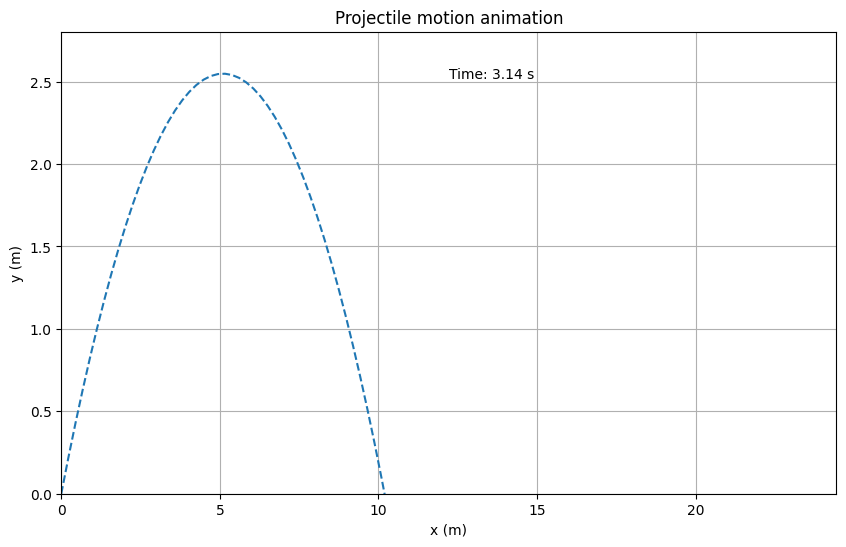

In [13]:
import matplotlib.pyplot as plt # 그래프를 그리기 위한 라이브러리
import numpy as np # 수학적 계산을 위한 라이브러리

####################################################################
# 0. 애니메이션을 만들기 위한 라이브러리 임포트
from matplotlib.animation import FuncAnimation # 애니메이션 기능을 위한 라이브러리
from IPython.display import HTML # Jupyter Notebook에서 애니메이션을 표시하기 위한 라이브러리

####################################################################
# 1. x와 y 데이터 생성
v0 = 10 # 초기 속도
g = 9.81 # 중력 가속도
theta = np.pi / 4 # 발사 각도 (45도)

t = np.linspace(0, np.pi, 100) # 0부터 2π까지 100개의 점 생성
# 포물선 운동 공식
x = v0 * np.cos(theta) * t # x 좌표
y = v0 * np.sin(theta) * t - 1/2 * g * t**2 # y 좌표

####################################################################
# 2. 그래프 초기 설정
fig = plt.figure(figsize=(10, 6)) # 그래프 크기 설정
ax = fig.add_subplot(1, 1, 1) # 1행 1열의 첫 번째 위치에 서브플롯 추가.
ax.set(title='Projectile motion animation', xlabel='x (m)', ylabel='y (m)') # 그래프 제목과 축 이름 설정
ax.set_xlim(0, np.max(x) * 1.1) # x축 범위 설정. 0부터 x의 최대값의 1.1배까지
ax.set_ylim(0, np.max(y) * 1.1) # y축 범위 설정
ax.grid(True) # 그리드 표시

####################################################################
# 3. 포물체의 궤적을 그릴 선과, 현재 위치를 표시할 그래프 객체를 생성한다.
# 이전에 subplot을 쓸 때는
# ax.plot()
# ...
# plt.show()
# 이렇게 썼지만, 이번에는 그래프를 업데이트해줘야 하므로 그래프에게 이름을 줘서 다시 불러올 필요가 있다. 
# 다음과 같이 line, point, text에 그래프를 그릴 객체를 저장해준다.
line, = ax.plot([], [], "--") # plot은 좌표들을 입력받아 선으로 잇는 함수. 아직 아무것도 그려지지 않은 상태임.
point = ax.scatter([], []) # scatter는 좌표들을 입력받아 점을 찍는 함수
text = ax.text(0.5, 0.9, '', transform=ax.transAxes) # text는 그래프에 글자를 그리는 함수. 그래프 상단에 현재 시간을 표시하는 용도
# ax.text의 입력: x좌표, y좌표, 표시할 텍스트(현재는 공백), transform=ax.transAxes는 ax의 좌표계를 사용하겠다는 의미

####################################################################
# 4. 애니메이션 업데이트 함수 만들기
# 프레임 번호를 입력으로 받아서, 해당 프레임에 맞는 데이터들로 바꿔치기 한다.
# 출력으로는 업데이트된 line, point, text를 반환한다.
def update(frame):

    line.set_data(x[:frame+1], y[:frame+1]) # 파이썬 인덱싱은 마지막 인덱스가 포함되지 않으므로, frame+1로 설정
    point.set_offsets((x[frame], y[frame])) # 현재 frame의 위치로 업데이트
    text.set_text(f'Time: {t[frame]:.2f} s') # 현재 시간 표시
    return line, point, text # 업데이트된 객체들을 반환

####################################################################
# 5. FuncAnimation으로 애니메이션 생성
# FuncAnimation을 사용하여 애니메이션을 생성한다.
# fig: 애니메이션을 그릴 Figure 객체
# update: 각 프레임을 업데이트할 함수
# frames: 애니메이션의 프레임 수, 여기서는 x의 길이만큼
# blit=True: 업데이트된 부분만 다시 그리도록 설정 (성능 향상을 위해)
# interval: 영상에서 프레임 간의 시간 간격 (밀리초 단위). 50일 경우 20fps

ani = FuncAnimation(fig, update, frames=len(x), blit=True, interval=50)
HTML(ani.to_jshtml()) # plt.show()와 같은 역할
# 재생 버튼을 눌러 애니메이션을 재생할 수 있다.


## 4. 과제

그림 4와 같은 애니메이션을 만드는 것이 목표였습니다. 현재 궤적과 점은 잘 구현이 되었으나, 속도를 나타내는 화살표와 텍스트는 아직 없죠. 과제는 이 두 가지를 추가하는 것입니다.

화살표를 그리기 위해서는 `ax.arrow()` 함수를 사용하면 됩니다. 이 함수는 시작점과 끝점의 좌표를 입력받아 화살표를 그립니다. 텍스트는 `ax.text()` 함수를 사용하여 그래프 상단에 현재 시간을 표시할 수 있습니다.

함수의 사용법은 직접 검색해보셔도 좋고, [한국어 블로그](https://cosmosproject.tistory.com/846)나 [공식 문서](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.arrow.html)에서 확인할 수 있습니다.